In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [6]:
df = pd.read_csv('../csv/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

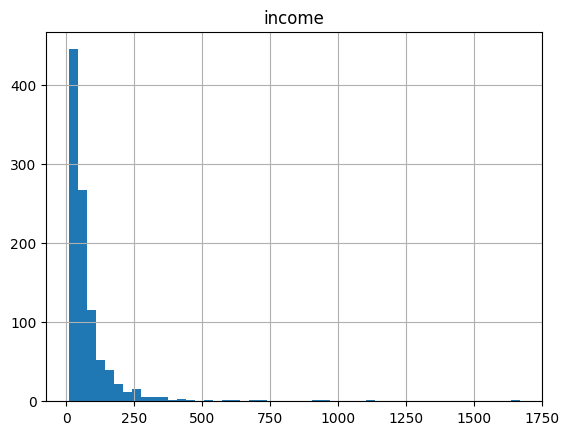

In [15]:
df.hist(column='income', bins = 50)

In [16]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [21]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [27]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [58]:
from sklearn.neighbors import KNeighborsClassifier

#Train and predict
K = 4
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [59]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([3, 1, 3, 1, 1], dtype=int64)

In [60]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train set Accuracy:  0.56


In [61]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Test set Accuracy:  0.295


In [97]:
Ks = 15
mean_acc = np.array([])
std_acc = np.array([])
ConfustionMx = []
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=neigh.predict(X_test)
    mean_acc = np.append(mean_acc, [metrics.accuracy_score(y_test, y_hat)])

    std_acc = np.append(std_acc, [np.std(y_hat == y_test)/np.sqrt(y_hat.shape[0])])
    

print(std_acc, mean_acc)


[0.03298485 0.0331191  0.03337477 0.03224709 0.03270321 0.0331191
 0.03270321 0.0331191  0.03361361 0.0331191  0.03337477 0.0324037
 0.03255572 0.03298485] [0.32  0.325 0.335 0.295 0.31  0.325 0.31  0.325 0.345 0.325 0.335 0.3
 0.305 0.32 ]


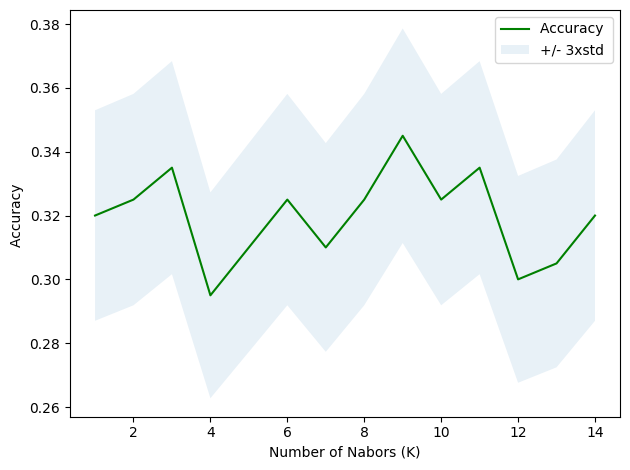

In [98]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc +1*std_acc, alpha = 0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()



In [99]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 9
